# DATA VISUALIZATION FILE

You can read the project file in my Medium repository using the following link:

https://medium.com/@surmeliali/the-rising-star-of-20th-century-toronto-city-33c881252260

In [1]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#LOADING DATASET

listing=pd.read_csv('data/listing_etl_processed.csv')

In [3]:
listing.head()

,Unnamed: 0,id,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,0,1419,1565,West End,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.13,1,0,2017,12,4
1,3,23691,93825,York,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,215,2019-10-27,1.85,2,13,2019,10,27
2,4,26654,113345,Downtown Core,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,2019-08-17,0.35,7,336,2019,8,17
3,7,40456,174063,West End,South Parkdale,43.63532,-79.44049,Entire home/apt,99,28,109,2019-11-08,0.96,3,273,2019,11,8
4,8,41887,183071,Scarborough,Oakridge,43.69466,-79.28667,Entire home/apt,69,2,82,2019-09-02,2.22,2,0,2019,9,2


### KEY QUESTIONS TO ANALYZE:


1) What districts offer the most diverse styles of houses, indicating the clusters of Airbnb guests? 

2) Which districts are the most popular among users? 

3) How does the city map look when divided by districts?
Can we determine locations in the two most popular districts with the most reviews and those that are cheaper than the rest? 

4) How is the distribution of room types across different districts? 

5) Can we analyze the mean prices according to room types district by district? 

6) What are the most expensive and popular months for Airbnb rentals?

With these questions in mind, let's proceed with loading our datasets.



## DATA ANALYSIS & VISUALIZATION:

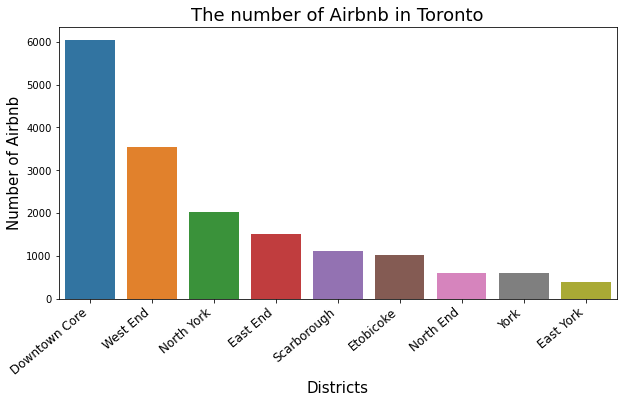

# Analysis 1:
-We visualize the number of Airbnb listings in each district of Toronto.
-This provides an overview of the popularity of different districts for Airbnb hosts.


In [5]:
##VISUALIZATION 1: Plotting the number of listings per district

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='district', data=listing, order=listing['district'].value_counts().sort_values(ascending=False).index)
ax.set_xlabel('Districts', weight='normal', size=15)
ax.set_ylabel('Number of Airbnb', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)
plt.title('The number of Airbnb in Toronto', fontsize=18)
plt.show()

analysis_1 = """
# Analysis 1:
-We visualize the number of Airbnb listings in each district of Toronto.
-This provides an overview of the popularity of different districts for Airbnb hosts.
""".strip()

print(analysis_1)



# Analysis 2:
-We plot the location of Airbnb listings on a map of Toronto using latitude and longitude information.
-The color represents the district in which the listing is located.


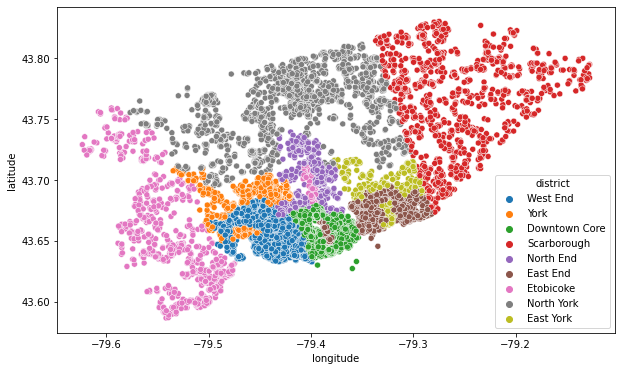

In [6]:
##VISUALIZATION 2: Visualization of bookings on the Toronto map using latitude and longitude columns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=listing.longitude, y=listing.latitude, hue=listing.district)
plt.ioff()

analysis_2 = """
# Analysis 2:
-We plot the location of Airbnb listings on a map of Toronto using latitude and longitude information.
-The color represents the district in which the listing is located.
""".strip()
print(analysis_2)



#Analysis 3: 
-We use the relplot function from seaborn to create a scatter plot on the Toronto map.
-The size of the markers represents the number of reviews, and different districts are distinguished by colors.
-This visualization helps us explore the distribution of popular listings across different districts.


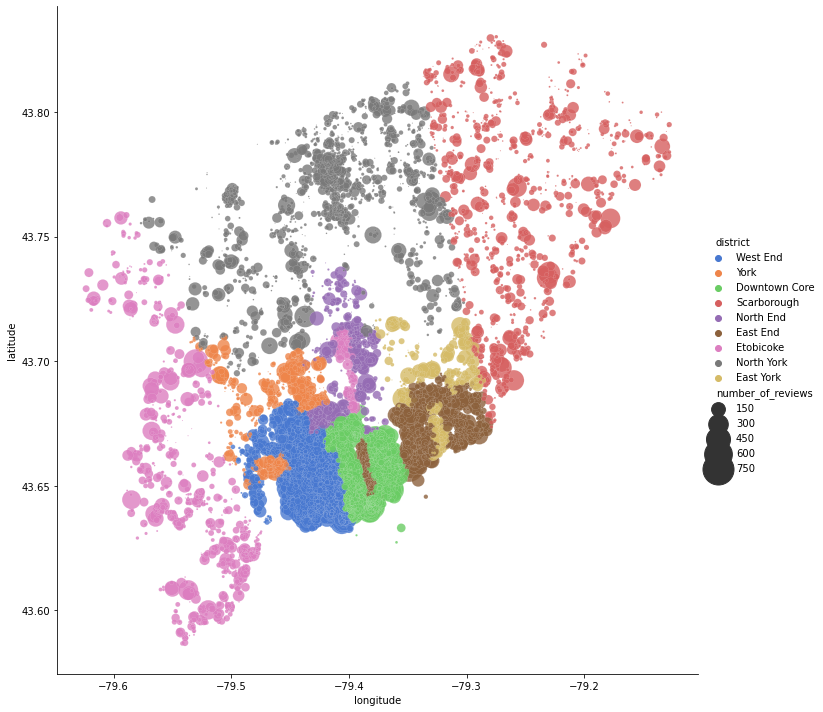

In [7]:
# VISUALIZATION 3: Enhanced visualization of bookings on the Toronto map by district, using number of reviews as the weight

sns.relplot(x="longitude", y="latitude", hue="district", size="number_of_reviews",
            sizes=(1, 1000), alpha=.8, palette="muted",
            height=10, data=listing)

analysis_3="""
#Analysis 3: 
-We use the relplot function from seaborn to create a scatter plot on the Toronto map.
-The size of the markers represents the number of reviews, and different districts are distinguished by colors.
-This visualization helps us explore the distribution of popular listings across different districts.
""".strip()
print(analysis_3)

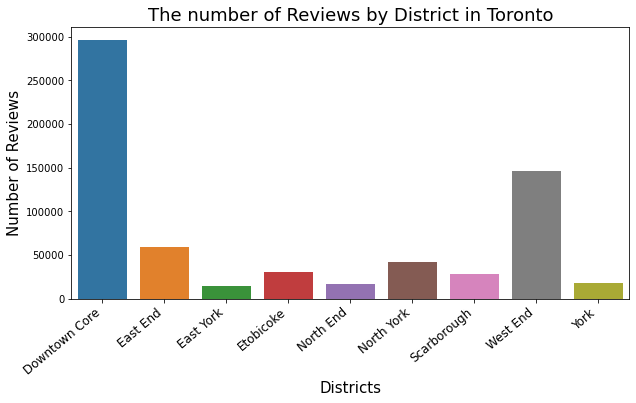

Analysis 4:
-We create a bar plot to visualize the number of reviews for each district in Toronto.
-This allows us to identify districts with higher review counts, indicating higher demand or popularity among guests.


In [8]:
# VISUALIZATION 4: Bar plot showing the number of reviews by district

# It will be better if we will look closely to the map by district since we have most of the intencity on 1 or 2 districts..
# We need to specify-explore which districts have more demand compering to the others.

numreviews=listing.groupby('district').sum()
numreviews.index.name=None

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=numreviews.index, y='number_of_reviews', data=numreviews)
ax.set_xlabel('Districts', weight='normal', size=15)
ax.set_ylabel('Number of Reviews', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)
plt.title('The number of Reviews by District in Toronto', fontsize=18)
plt.show()

analysis_4 = """
Analysis 4:
-We create a bar plot to visualize the number of reviews for each district in Toronto.
-This allows us to identify districts with higher review counts, indicating higher demand or popularity among guests.
""".strip()

print(analysis_4)


As we see, more than %75 percent of reviews belongs to Downtown Core & West End regions.
Lets visualize it on map for see district popular area more closely..



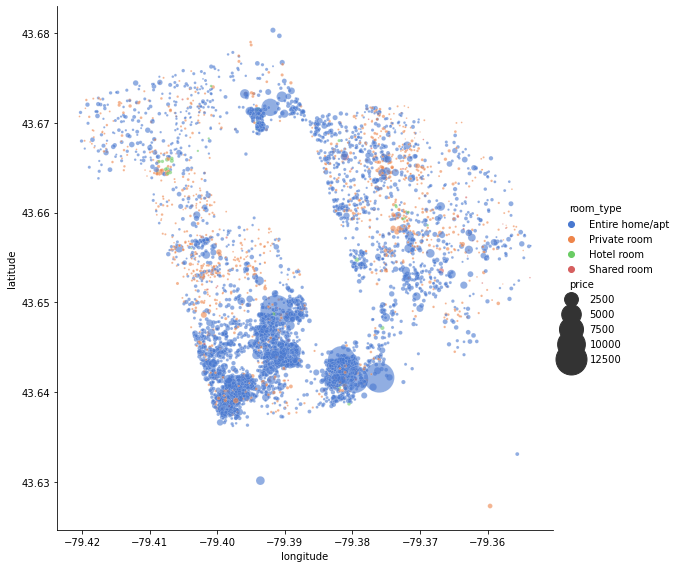

In [9]:
# VISUALIZATION 5: Visualization of downtown district (Downtown Core) by room type and price

analysis_5 = """
As we see, more than %75 percent of reviews belongs to Downtown Core & West End regions.
Lets visualize it on map for see district popular area more closely..
"""

downtown=listing[(listing['district'] == "Downtown Core" )]
westend=listing[(listing['district'] == "West End" )]


sns.relplot(x="longitude", y="latitude", hue="room_type", size="price",
            sizes=(1, 1000), alpha=.6, palette="muted",
            height=8, data=downtown)

"""
- Analysis 5:
- We create a scatter plot on the map of the downtown district (Downtown Core)
- For Downtown, it seems southern west is more popular area.. 
- We can assume that most activities centered around here. 

""".strip()
print(analysis_5)

Analysis 6:
- This scatter plot shows the distribution of different room types (Entire home/apt, Private room, Shared room) in the West End district of Toronto.
- The color represents the room type, while the size represents the price. 
- It allows us to visualize the spatial distribution of different room types and their corresponding prices in the West End area. 
- From the plot, it appears that the southern part of the West End has a higher concentration of listings, 
  which could be useful information for those looking to choose a place to stay in that district.


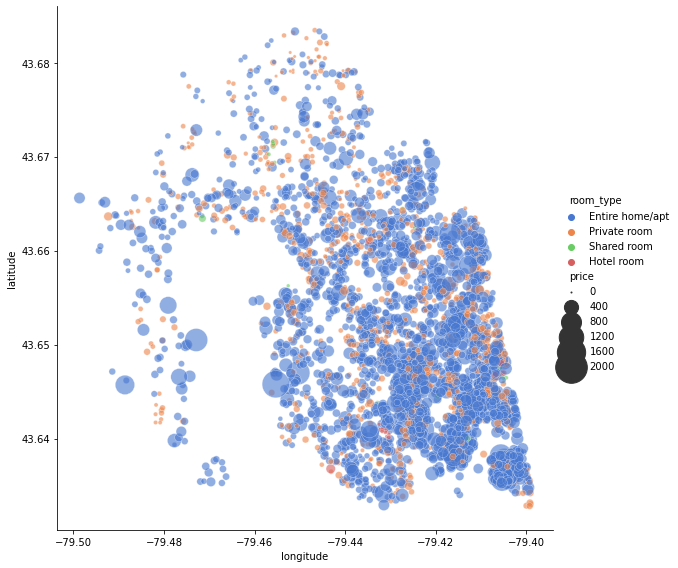

In [10]:
# Visualization 6: WEST-END MAP BY ROOM_TYPE & PRICE

sns.relplot(x="longitude", y="latitude", hue="room_type", size="price",
sizes=(1 , 1000), alpha=.6, palette="muted",
height=8, data=westend)

analysis_6="""
Analysis 6:
- This scatter plot shows the distribution of different room types (Entire home/apt, Private room, Shared room) in the West End district of Toronto.
- The color represents the room type, while the size represents the price. 
- It allows us to visualize the spatial distribution of different room types and their corresponding prices in the West End area. 
- From the plot, it appears that the southern part of the West End has a higher concentration of listings, 
  which could be useful information for those looking to choose a place to stay in that district.
""".strip()
print(analysis_6)

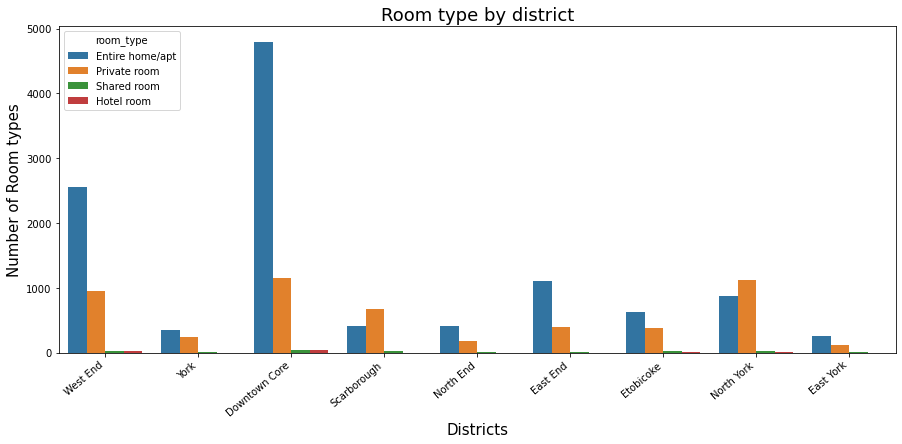

Analysis 7:
- This bar plot illustrates the number of each room type (Entire home/apt, Private room, Shared room) available in each district of Toronto.
- The x-axis represents the districts, while the y-axis represents the count of room types. The different colors in the bars indicate the room types.
- It provides an overview of the room type distribution across different districts in Toronto, allowing us to compare the availability of different types of accommodations in each district.


In [12]:
# Visualization 7: Show number and type of rooms by neighborhood

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='district', hue='room_type', data=listing)
ax.set_xlabel('Districts', weight='normal', size=15)
ax.set_ylabel('Number of Room types', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Room type by district', fontsize=18)
plt.show()

analysis_7 = """
Analysis 7:
- This bar plot illustrates the number of each room type (Entire home/apt, Private room, Shared room) available in each district of Toronto.
- The x-axis represents the districts, while the y-axis represents the count of room types. The different colors in the bars indicate the room types.
- It provides an overview of the room type distribution across different districts in Toronto, allowing us to compare the availability of different types of accommodations in each district.
""".strip()

print(analysis_7)

In [13]:
westend_entire=listing[(listing["room_type"]=="Entire home/apt") & (listing['district'] == "West End" )]
westend_private=listing[(listing["room_type"]=="Private room") & (listing['district'] == "West End" )]
downtown_entire=listing[(listing["room_type"]=="Entire home/apt") & (listing['district'] == "Downtown Core" )]
downtown_private=listing[(listing["room_type"]=="Private room") & (listing['district'] == "Downtown Core" )]

Analysis 8:
- This scatter plot visualizes the distribution of private rooms in the downtown district (Downtown Core) of Toronto.
- The hue represents the year, while the size represents the price. It allows us to observe how the prices of private rooms are distributed spatially within the downtown area and how they vary across different years.


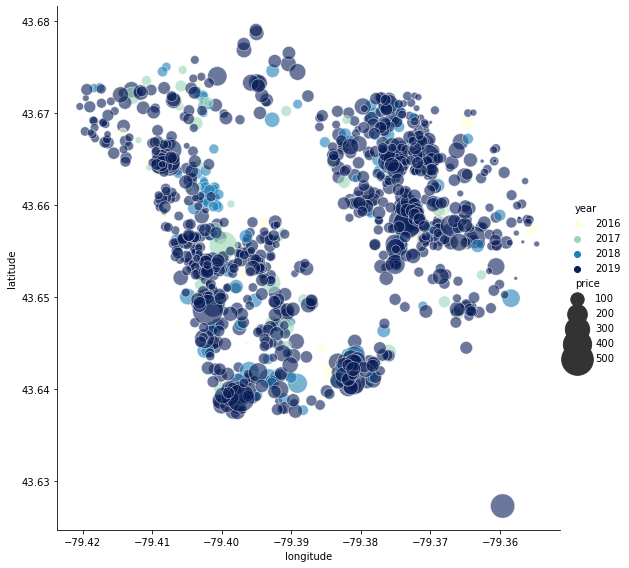

In [14]:
# Visualization 8:

sns.relplot(x="longitude", y="latitude", hue="year", size="price",
sizes=(1 , 1000), alpha=.6, palette="YlGnBu",
height=8, data=downtown_private)

analysis_8 = """
Analysis 8:
- This scatter plot visualizes the distribution of private rooms in the downtown district (Downtown Core) of Toronto.
- The hue represents the year, while the size represents the price. It allows us to observe how the prices of private rooms are distributed spatially within the downtown area and how they vary across different years.
""".strip()

print(analysis_8)

Analysis 9:
- This scatter plot represents the distribution of entire homes/apartments in the downtown district (Downtown Core) of Toronto.
- The color represents the room type (Entire home/apt), while the size represents the price. 
It allows us to visualize the spatial distribution of entire homes/apartments and their corresponding prices in the downtown area. 
- From the plot, we can observe the concentration of higher-priced entire homes/apartments in certain areas of the district.


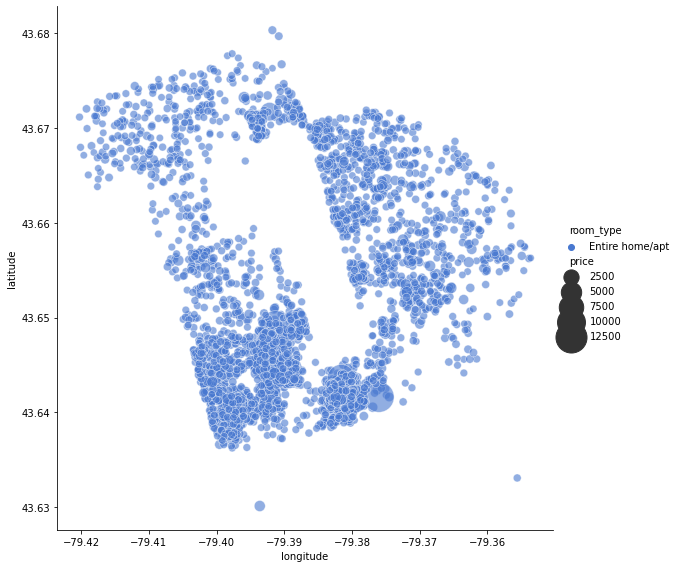

In [15]:
#Visualization 9:

sns.relplot(x="longitude", y="latitude", hue="room_type", size="price",
sizes=(50 , 1000), alpha=.6, palette="muted",
height=8, data=downtown_entire)

analysis_9 = """
Analysis 9:
- This scatter plot represents the distribution of entire homes/apartments in the downtown district (Downtown Core) of Toronto.
- The color represents the room type (Entire home/apt), while the size represents the price. 
It allows us to visualize the spatial distribution of entire homes/apartments and their corresponding prices in the downtown area. 
- From the plot, we can observe the concentration of higher-priced entire homes/apartments in certain areas of the district.
""".strip()
print(analysis_9)

# Prices According to Room Type

/var/folders/x_/f04g2fd96fl8v0247mp9qw8r0000gn/T/ipykernel_1179/3738946588.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=40, ha='right', fontsize=12)


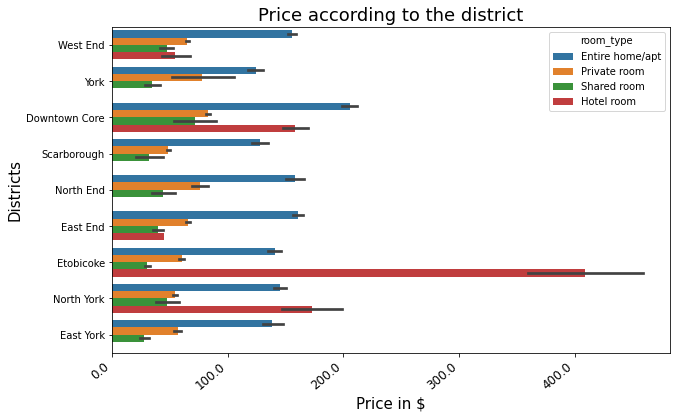

Analysis 10:
- This bar plot visualizes the prices of Airbnb listings in different districts of Toronto.
- The x-axis represents the price in dollars, while the y-axis represents the districts.
- Each bar is color-coded based on the room type.
- This visualization helps us compare the prices of different room types across districts.


In [16]:
plt.figure(figsize=(10, 6))
# Draw plot
ax = sns.barplot(x='price', y='district', data=listing, ci=80, hue='room_type')
# Set the axes
ax.set_xlabel('Price in $', weight='normal', size=15)
ax.set_ylabel('Districts', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticks(), rotation=40, ha='right', fontsize=12)
# Set title
plt.title('Price according to the district', fontsize=18)
# Show plot
plt.show()

analysis_10 = """
Analysis 10:
- This bar plot visualizes the prices of Airbnb listings in different districts of Toronto.
- The x-axis represents the price in dollars, while the y-axis represents the districts.
- Each bar is color-coded based on the room type.
- This visualization helps us compare the prices of different room types across districts.
""".strip()

print(analysis_10)



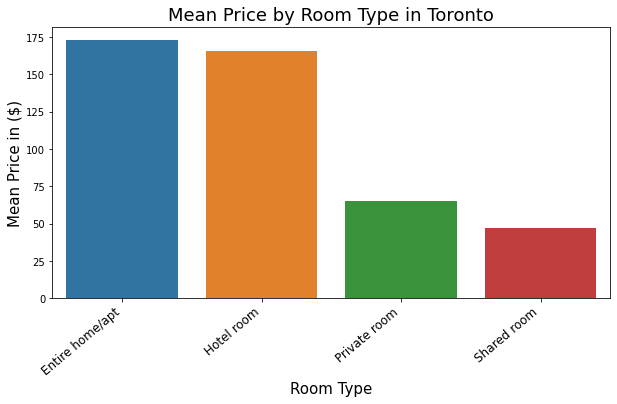

Analysis 11:
- In this bar plot, we display the mean prices of different room types in Toronto. 
- The x-axis represents the room types, while the y-axis represents the mean price in dollars. 
- This visualization allows us to compare the average prices across different room types, 
providing insights into the price distribution within the city.


In [17]:
# Visualization 11:

mean_prices_by_room_type = listing.groupby('room_type').mean()
mean_prices_by_room_type.index.name = None



plt.figure(figsize=(10, 5))
ax = sns.barplot(x=mean_prices_by_room_type.index, y='price', data=mean_prices_by_room_type)
ax.set_xlabel('Room Type', weight='normal', size=15)
ax.set_ylabel('Mean Price in ($)', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)
plt.title('Mean Price by Room Type in Toronto', fontsize=18)
plt.show()

analysis_11 = """
Analysis 11:
- In this bar plot, we display the mean prices of different room types in Toronto. 
- The x-axis represents the room types, while the y-axis represents the mean price in dollars. 
- This visualization allows us to compare the average prices across different room types, 
providing insights into the price distribution within the city.
""".strip()

print(analysis_11)

/var/folders/x_/f04g2fd96fl8v0247mp9qw8r0000gn/T/ipykernel_1179/3789092351.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=40, ha='right', fontsize=12)


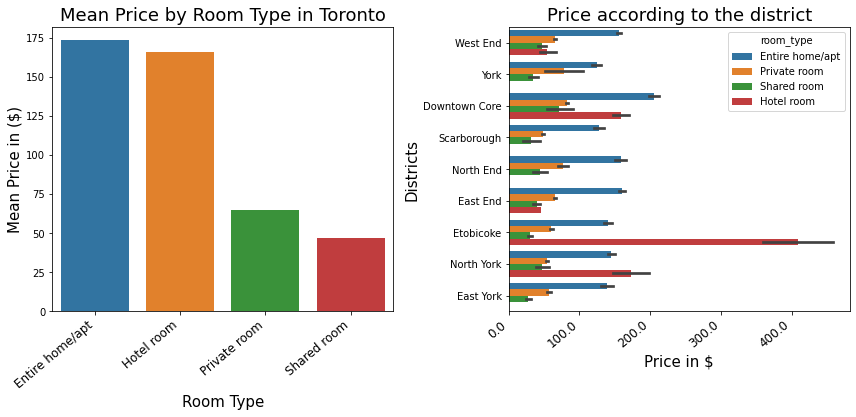

Analysis 12:
- This visualization combines Visualization 6 and Visualization 7 for more effective analysis. 
- The top-left subplot represents the mean prices of different room types in Toronto. 
- The top-right subplot displays the prices of Airbnb listings in different districts, grouped by room type. 
- By presenting these two visualizations together, we can gain a better understanding of the relationship between room type, price, and district.


In [18]:
# Visualization 12:

fig = plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
ax = sns.barplot(x=mean_prices_by_room_type.index, y='price', data=mean_prices_by_room_type)
ax.set_xlabel('Room Type', weight='normal', size=15)
ax.set_ylabel('Mean Price in ($)', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
plt.title('Mean Price by Room Type in Toronto', fontsize=18)

plt.subplot(2, 2, 2)
ax = sns.barplot(x='price', y='district', data=listing, ci=80, hue='room_type')
ax.set_xlabel('Price in $', weight='normal', size=15)
ax.set_ylabel('Districts', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticks(), rotation=40, ha='right', fontsize=12)
plt.title('Price according to the district', fontsize=18)

plt.tight_layout()
plt.show()

analysis_12 = """
Analysis 12:
- This visualization combines Visualization 6 and Visualization 7 for more effective analysis. 
- The top-left subplot represents the mean prices of different room types in Toronto. 
- The top-right subplot displays the prices of Airbnb listings in different districts, grouped by room type. 
- By presenting these two visualizations together, we can gain a better understanding of the relationship between room type, price, and district.
""".strip()

print(analysis_12)



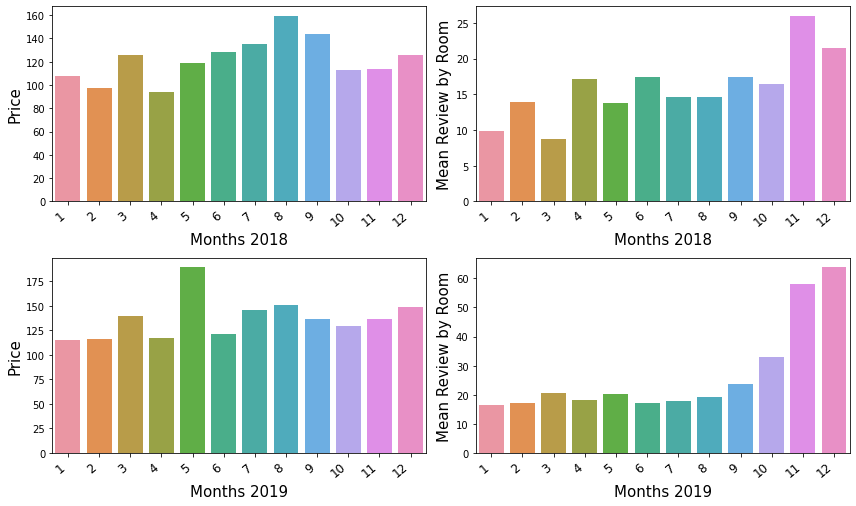

Analysis 14:
This visualization focuses on comparing prices and review counts by month for the years 2018 and 2019. 
It consists of four subplots:

-The top-left subplot displays the average prices per month in 2018.
-The top-right subplot shows the mean review counts per room in 2018.
-The bottom-left subplot represents the average prices per month in 2019.
-The bottom-right subplot presents the mean review counts per room in 2019.

These subplots allow us to observe any patterns or trends in prices and review counts across different months and years.


In [19]:
# Visualization 13:

year2019 = listing[listing['year'] == 2019]
year2018 = listing[listing['year'] == 2018]
month_sum_2019 = year2019.groupby('month').sum()
month_mean_2019 = year2019.groupby('month').mean()
month_sum_2018 = year2018.groupby('month').sum()
month_mean_2018 = year2018.groupby('month').mean()

fig = plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
ax = sns.barplot(x=month_mean_2018.index, y='price', data=month_mean_2018)
ax.set_xlabel('Months 2018', weight='normal', size=15)
ax.set_ylabel('Price', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)

plt.subplot(3, 2, 2)
ax = sns.barplot(x=month_sum_2018.index, y='number_of_reviews', data=month_mean_2018)
ax.set_xlabel('Months 2018', weight='normal', size=15)
ax.set_ylabel('Mean Review by Room', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)

plt.subplot(3, 2, 3)
ax = sns.barplot(x=month_mean_2019.index, y='price', data=month_mean_2019)
ax.set_xlabel('Months 2019', weight='normal', size=15)
ax.set_ylabel('Price', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)

plt.subplot(3, 2, 4)
ax = sns.barplot(x=month_sum_2019.index, y='number_of_reviews', data=month_mean_2019)
ax.set_xlabel('Months 2019', weight='normal', size=15)
ax.set_ylabel('Mean Review by Room', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)

plt.tight_layout()
plt.show()


analysis_13 = """
Analysis 14:
This visualization focuses on comparing prices and review counts by month for the years 2018 and 2019. 
It consists of four subplots:

-The top-left subplot displays the average prices per month in 2018.
-The top-right subplot shows the mean review counts per room in 2018.
-The bottom-left subplot represents the average prices per month in 2019.
-The bottom-right subplot presents the mean review counts per room in 2019.

These subplots allow us to observe any patterns or trends in prices and review counts across different months and years.
""".strip()
print(analysis_13)